In [74]:
print("Hello this is working")

Hello this is working


In [2]:
import pandas as pd 
data = pd.read_csv('data.csv')

ModuleNotFoundError: No module named 'pandas'

In [2]:
data.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

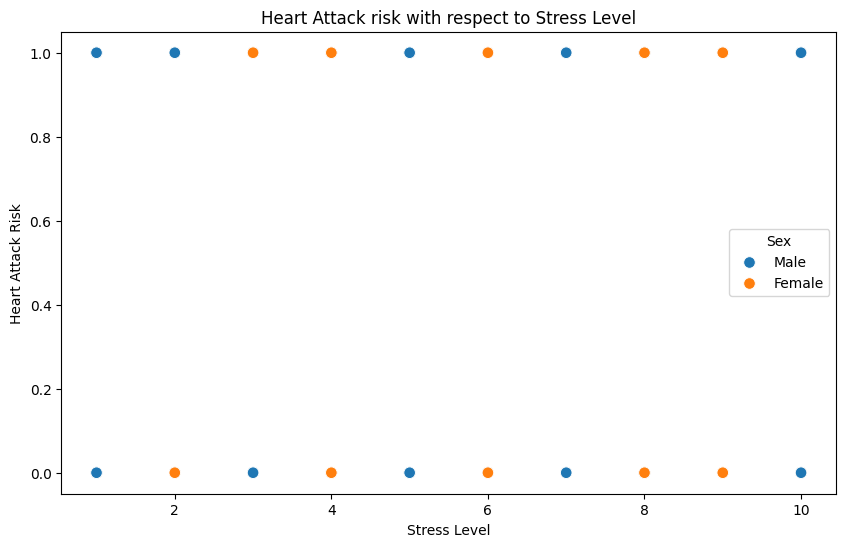

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x='Stress Level', y = 'Heart Attack Risk', hue = 'Sex',data = data,s = 70).set_title('Heart Attack risk with respect to Stress Level')
plt.show()

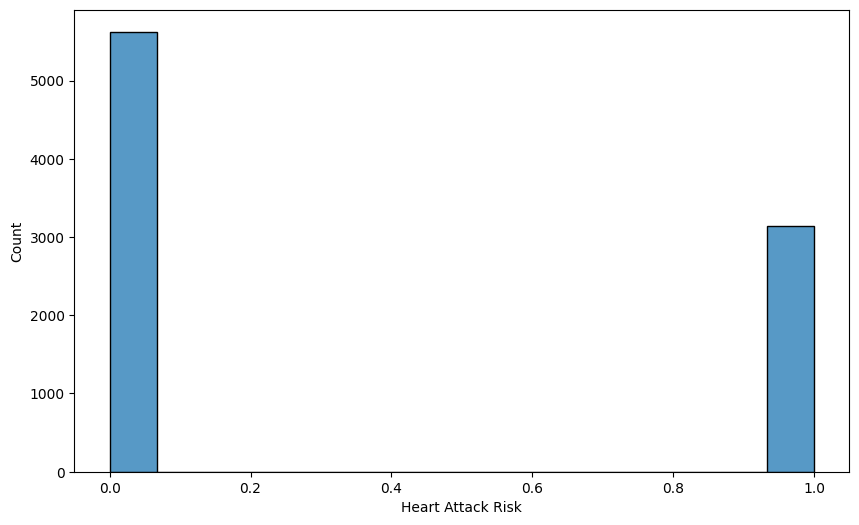

In [5]:
plt.figure(figsize=(10,6))
sns.histplot(data = data['Heart Attack Risk'])
plt.show()

In [6]:
data['Stress Level'] = data['Stress Level'].apply(lambda x: 0 if x <5 else 1)

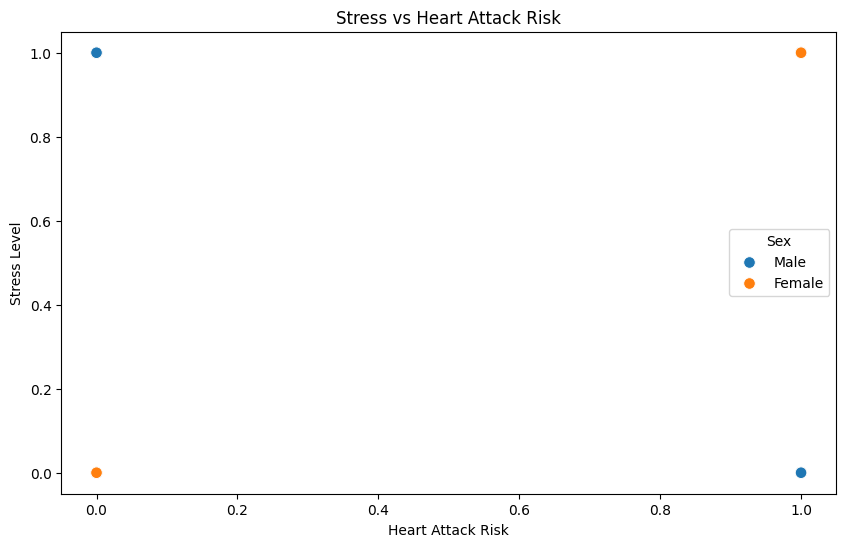

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = 'Heart Attack Risk', y = 'Stress Level', hue= 'Sex', data = data, s = 70).set_title('Stress vs Heart Attack Risk')
plt.show()

In [11]:
print(data['Sex'].value_counts())
print(data['Heart Attack Risk'].value_counts())

Sex
Male      6111
Female    2652
Name: count, dtype: int64
Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


In [19]:
female_heart_attack = len(data[(data['Sex'] == 'Female') & (data['Heart Attack Risk'] == 1)])
male_heart_attack = len(data[(data['Sex']== 'Male')& (data['Heart Attack Risk'] == 1)])

print(female_heart_attack, male_heart_attack)

944 2195


As we can see 944 out of the 2652 females had a Heart Attack Risk and 2195 out of the 6111 males had an Heart Attack Risk
Percentage : 
- Female = 35.6%
- Male = 35.9% 

Now let us calculate the percentage of deaths caused by heart attack for both the genders

In [20]:
stress_attack_female = len(data[(data['Sex'] == 'Female') & (data['Stress Level'] == 1) & (data['Heart Attack Risk'] == 1 )])
stress_attack_male = len(data[(data['Sex'] == 'Male') & (data['Stress Level'] == 1) & (data['Heart Attack Risk'] == 1 )])

print(stress_attack_female, stress_attack_male)

567 1309


So out of the 944 females who had a high risk of heart attack 567 of them had high stress levels on the other hand
1309 males out of the 2195 had a high risk of heart attack

Percentage :
- Female = 60%
- Male = 59.6%

As we can see more than half of the people who had high risk of Heart Attack also had a high level of Stress 
This shows a relation between the two, but there are still some confounding factors which prevent us from 
learning the true effect of stress level on heart attack risk.

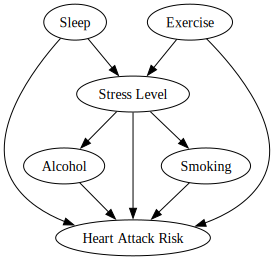

In [24]:
import graphviz as gr 

g = gr.Digraph()

g.edge('Stress Level', 'Heart Attack Risk')
g.edge('Sleep','Stress Level')
g.edge('Sleep','Heart Attack Risk')
g.edge('Exercise','Stress Level')
g.edge('Exercise','Heart Attack Risk')
g.edge('Stress Level','Smoking')
g.edge('Smoking','Heart Attack Risk')
g.edge('Stress Level','Alcohol')
g.edge('Alcohol','Heart Attack Risk')
g

This is how the Graphical Causal Model would look like. There are a lot of Unseen features affecting 
stress level like work or family problems which cannot be calculated. 

As we can see there are two confounders : Sleep and Exercise 
- In medical research it is proven that a good sleep cycle reduces stress as well as the risk to heart attack 
- A person who exercises frequently has low risk of heart attack along with low stress levels

As for the mediators : Alcohol and Smoking
- People tend to drink more Alcohol when they are stressed which leads to Heart attack and the same 
goes for smoking 



--------------------------------------------------------------------------------------------------------------------------------------------
## First we would calculate the total effect of Stress Level on Heart Attack Risk 
That means only controlling on the confounders to close the backdoor path.

In [39]:
data.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Activity', 'Diet', 'Previous Heart Problems',
       'Medication Use', 'StressLevel', 'Sedentary Hours Per Day', 'Income',
       'BMI', 'Triglycerides', 'Physical Activity Days Per Week', 'Sleep',
       'Country', 'Continent', 'Hemisphere', 'HeartAttackRisk'],
      dtype='object')

In [38]:
data.rename(columns = {
    'Heart Attack Risk' : 'HeartAttackRisk',
    'Stress Level' : 'StressLevel',
    'Sleep Hours Per Day' : 'Sleep',
    'Exercise Hours Per Week': 'Activity',
}, inplace = True)

In [45]:
import statsmodels.formula.api as smf 

model = smf.ols('HeartAttackRisk ~ StressLevel + Sleep + Activity', data = data).fit()
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,0.3844,0.023,16.613,0.000,0.339,0.430
StressLevel,-0.0007,0.002,-0.400,0.689,-0.004,0.003
Sleep,-0.0045,0.003,-1.739,0.082,-0.010,0.001
Activity,0.0009,0.001,1.036,0.300,-0.001,0.003


In [49]:
from dowhy import CausalModel

graph_1 = '''
graph = [
    directed 1
    
    node [id 'Sleep' label 'Sleep']
    mode [id 'Activity' label 'Activity']
    node [id 'StressLevel' label 'StressLevel']
    node [id 'Smoking' label 'Smoking']
    node [id 'Alcohol' label 'Alcohol']
    node [id 'HeartAttackRisk' label 'HeartAttackRisk']
    
    edge [source 'Sleep' target 'StressLevel']
    edge [source 'Activity' target 'StressLevel']
    edge [source 'StressLevel' target 'HeartAttackRisk']
    edge [source 'StressLevel' target 'Smoking']
    edge [source 'StressLevel' target 'Alcohol']
    edge [source 'Smoking' target 'HeartAttackRisk']
    edge [source 'Alcohol' target 'HeartAttackRisk']
    ]'''
    
model_1 = CausalModel(data = data,
                    treatment='StressLevel',
                    outcome= 'HeartAttackRisk',
                    graph = graph_1,
                    )

ImportError: dlopen(/Users/omkarnaik/Causal-Inferece/lib/python3.11/site-packages/statsmodels/tsa/statespace/_representation.cpython-311-darwin.so, 0x0002): symbol not found in flat namespace '_npy_cabs'

In [43]:
from causalinference import CausalModel

cm = CausalModel(
    Y = data['HeartAttackRisk'].values,
    D = data['StressLevel'].values,
    X = data[['Sex','Age','Activity','Sleep']].values
)
cm.est_via_ols(adj = 0)
print(cm.estimates)

ValueError: Too few control units: N_c < K+1

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   int64  
 5   FAVC                            2111 non-null   int64  
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   int64  
 9   SMOKE                           2111 non-null   int64  
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   int64  
 12  FAF                             21